## Econ 430
### UCLA, Master of Quantitative Economics
#### Dr. Randall R. Rojas

# Multiple Regression: Indicator Variables

## Example (1): Interaction Effect between a dummy variable and quantitative variable
### Home Prices
$$PRICE  = \beta_1 + \beta_2 UTOWN + \beta_3 SQFT + \beta_4 (UTOWN \times SQFT) + \beta_5 AGE + \beta_6 POOL + \beta_7 FPLACE +e$$

In [13]:
# Load Modules and Functions
import statsmodels.api as sm
import statsmodels as sms
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import random
from statsmodels.iolib.summary2 import summary_col
from statsmodels.stats.anova import anova_lm
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")

In [2]:
# Load the data:
utown = pd.read_csv('utown.csv')
df0 = utown.head()

df0.dtypes # Show variable types
df0

,price,sqft,age,utown,pool,fplace
0,205.452,23.46,6,0,0,1
1,185.328,20.03,5,0,0,1
2,248.422,27.77,6,0,0,0
3,154.690,20.17,1,0,0,0
4,221.801,26.45,0,0,0,1


In [3]:
df1 = pd.get_dummies(utown, columns = ['utown', 'pool','fplace'], drop_first = True) # drops the 'base' category
tbl = df1.head()
tbl.dtypes

price       float64
sqft        float64
age           int64
utown_1        bool
pool_1         bool
fplace_1       bool
dtype: object

In [11]:
# Regression with categorical variables: house prices

mod4 = smf.ols('price ~ utown_1*sqft + age + pool_1 +fplace_1', data = df1).fit()

# Marginal effect of sqrt when utown = 0:

bsqft = 1000*mod4.params["sqft"]

# Marginal effect of sqrt when utown = 1:

bsqft1 = 1000*(mod4.params["sqft"] + mod4.params["utown_1[T.True]:sqft"])

# Prepare coefficient table for printing:

tbl = mod4.summary2().tables[1].iloc[:, 0:4]
tbl

,Coef.,Std.Err.,t,P>|t|
Intercept,24.499985,6.191721,3.956894,8.133318e-05
utown_1[T.True],27.452952,8.422582,3.259446,1.154211e-03
pool_1[T.True],4.377163,1.196692,3.657720,2.678367e-04
fplace_1[T.True],1.649176,0.971957,1.696758,9.005579e-02
sqft,7.612177,0.245176,31.047746,1.867482e-148
utown_1[T.True]:sqft,1.299405,0.332048,3.913307,9.724529e-05
age,-0.190086,0.051205,-3.712291,2.168115e-04


###  Method 2: Changing variable type to 'category' with `.astype()`

In [12]:
df2 = pd.read_csv('utown.csv')

for i in ['utown', 'pool', 'fplace']:

  df2[i] = df2[i].astype('category')

df2.dtypes

price      float64
sqft       float64
age          int64
utown     category
pool      category
fplace    category
dtype: object

### Method 3: Declare categorical variables at reading

In [13]:
df3 = pd.read_csv('utown.csv', dtype = {'utown': 'category', 'pool': 'category', 'fplace': 'category'})

df3.dtypes

price      float64
sqft       float64
age          int64
utown     category
pool      category
fplace    category
dtype: object

In [15]:
# Descriptive statistics: only for the categorical variables:

df3.describe(include = 'category')

,utown,pool,fplace
count,1000,1000,1000
unique,2,2,2
top,1,0,1
freq,519,796,518


In [16]:
# Regression with categorical variables: house prices

mod4 = smf.ols('price ~ utown*sqft + age + pool + fplace', data = df3).fit()

tbl = mod4.summary2().tables[1].iloc[:, 0:4]
tbl

,Coef.,Std.Err.,t,P>|t|
Intercept,24.499985,6.191721,3.956894,8.133318e-05
utown[T.1],27.452952,8.422582,3.259446,1.154211e-03
pool[T.1],4.377163,1.196692,3.657720,2.678367e-04
fplace[T.1],1.649176,0.971957,1.696758,9.005579e-02
sqft,7.612177,0.245176,31.047746,1.867482e-148
utown[T.1]:sqft,1.299405,0.332048,3.913307,9.724529e-05
age,-0.190086,0.051205,-3.712291,2.168115e-04


### Method 3: Using the `C()` operator.

In [17]:
df4 = pd.read_csv('utown.csv')

mod4 = smf.ols('price ~ C(utown)*sqft + age + C(pool) + C(fplace)', data = df4).fit()

mod4.summary2().tables[1].iloc[:, :-2].round(4)

,Coef.,Std.Err.,t,P>|t|
Intercept,24.5000,6.1917,3.9569,0.0001
C(utown)[T.1],27.4530,8.4226,3.2594,0.0012
C(pool)[T.1],4.3772,1.1967,3.6577,0.0003
C(fplace)[T.1],1.6492,0.9720,1.6968,0.0901
sqft,7.6122,0.2452,31.0477,0.0000
C(utown)[T.1]:sqft,1.2994,0.3320,3.9133,0.0001
age,-0.1901,0.0512,-3.7123,0.0002


## Example (2): Interaction Effect between two dummy variables 
### Hourly Wages
$$WAGE =  \beta_1 + \beta_2 EDUC + \delta_1 BLACK + \delta_2 FEMALE + \gamma(BLACK \times FEMALE) +e.$$

In [18]:
# A 'black-female' wage discrimination model
df0 = pd.read_csv('cps5_small.csv')

df0.dtypes

mod5 = smf.ols('wage ~ educ + black*female', data = df0).fit()

# Rename some of the coefficients:

delta1 = mod5.params["black"]

delta2 = mod5.params["female"]

gamma = mod5.params["black:female"]

# The effects of specific categories:

blfm = delta1 + delta2 + gamma # The 'black female' effect

tbl = mod5.summary2().tables[1]

tbl

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,-9.482057,1.957971,-4.842796,1.448022e-06,-13.323501,-5.640613
educ,2.473699,0.135104,18.309580,3.349292e-66,2.208631,2.738767
black,-2.065262,2.161634,-0.955417,3.395599e-01,-6.306282,2.175757
female,-4.223465,0.824927,-5.119805,3.561892e-07,-5.841931,-2.604999
black:female,0.532927,2.802025,0.190194,8.491898e-01,-4.964509,6.030363


In [19]:
# Test joint hypothesis Ho: 'race, gender not significant'

hypothesis = ["black = 0", "female = 0", "black:female = 0"]

test = mod5.f_test(hypothesis)

print(' F-statistic =', '{:8.4f}'.format(test.fvalue),'\n', 'p-value =', '{:10.8f}'.format(test.pvalue))


#Select the `Other` region in the cps5_small dataset

df0 = pd.read_csv('cps5_small.csv')

df1 = df0[\

(df0['west'] == 0) &\

(df0['midwest'] == 0) &\

(df0['south'] == 0)]

tbl = df1.describe().iloc[:, 4:]

 F-statistic =  10.5183 
 p-value = 0.00000079


In [3]:
# Convert a set of indicators into a multilevel categorical

cps5 = pd.read_csv('cps5.csv')

# Select only the regional indicator variables in cps5:

regind = cps5[['northeast', 'south', 'west', 'midwest']]

# Convert the four indicators into a 4-item categorical called

# 'region' (the set of indicators must be complete to apply

# this method; i.e., they must sum to 1 for all observations):

cps5['region'] = regind.columns[np.where(regind!=0)[1]]

# Prepare table for printing:

tbl = cps5[['south', 'west', 'midwest', 'northeast', 'region']]

tbl = tbl.sample(4, random_state = 2)

print('\n', "Random sample from cps5 showing the 'region' variables", '\n', '\n', tbl)


 Random sample from cps5 showing the 'region' variables 
 
       south  west  midwest  northeast     region
8074      0     1        0          0       west
3267      0     0        1          0    midwest
230       0     0        0          1  northeast
127       0     0        0          1  northeast


In [4]:
# Include a multilevel categorical variable in regression

res1 = smf.ols("wage ~ educ + black*female + C(region, Treatment(reference = 'northeast'))",  data = cps5).fit()

tbl = pd.DataFrame(res1.summary2().tables[1]['Coef.'])

tbl1 = res1.summary2().tables[1].iloc[:, :-2].round(4)

tbl1.index = ['Intercept', 'T.midwest', 'T.south', 'T.west','educ', 'black', 'female', 'black:female']

print('Regression coefficient table with changed row names:', '\n', tbl1)

Regression coefficient table with changed row names: 
                Coef.  Std.Err.        t   P>|t|
Intercept    -8.5196    0.8406 -10.1349  0.0000
T.midwest    -2.4299    0.4356  -5.5785  0.0000
T.south      -0.9405    0.4195  -2.2420  0.0250
T.west        0.0088    0.4450   0.0197  0.9843
educ          2.4630    0.0531  46.3587  0.0000
black        -4.3028    0.7551  -5.6982  0.0000
female       -4.2161    0.3092 -13.6361  0.0000
black:female  3.1015    1.0246   3.0269  0.0025


D:\Anaconda\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
D:\Anaconda\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
D:\Anaconda\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
D:\Anaconda\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
D:\Anaconda\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_d

In [11]:
tbl1 = res1.summary2().tables[1].iloc[:, :-2].round(4)
tbl1

,Coef.,Std.Err.,t,P>|t|
Intercept,-8.5196,0.8406,-10.1349,0.0000
"C(region, Treatment(reference='northeast'))[T.midwest]",-2.4299,0.4356,-5.5785,0.0000
"C(region, Treatment(reference='northeast'))[T.south]",-0.9405,0.4195,-2.2420,0.0250
"C(region, Treatment(reference='northeast'))[T.west]",0.0088,0.4450,0.0197,0.9843
educ,2.4630,0.0531,46.3587,0.0000
black,-4.3028,0.7551,-5.6982,0.0000
female,-4.2161,0.3092,-13.6361,0.0000
black:female,3.1015,1.0246,3.0269,0.0025


In [22]:
# Wage equation with regional indicators; data = cps5_small

cps5_small = pd.read_csv('cps5_small.csv')

mod5a = smf.ols('wage ~ educ + black*female + south + midwest + west', data = cps5_small).fit()

tbl = mod5a.summary2().tables[1]
tbl

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,-8.370817,2.153964,-3.886238,1.074154e-04,-12.596800,-4.144834
educ,2.467003,0.135102,18.260325,7.077020e-66,2.201939,2.732067
black,-1.877719,2.179942,-0.861362,3.892120e-01,-6.154670,2.399232
female,-4.186052,0.824552,-5.076759,4.451148e-07,-5.803787,-2.568317
black:female,0.618998,2.800792,0.221008,8.251239e-01,-4.876034,6.114029
south,-1.652261,1.155687,-1.429679,1.530713e-01,-3.919667,0.615146
midwest,-1.939205,1.208285,-1.604923,1.087756e-01,-4.309807,0.431398
west,-0.145190,1.202670,-0.120723,9.039306e-01,-2.504777,2.214396


In [23]:
# Joint hypothesis testing on regional indicators

hypothesis = ['south = 0','midwest = 0','west = 0']

lhtest = mod5a.f_test(hypothesis)

print(' F-statistic =', '{:6.4f}'.format(lhtest.fvalue), '\n', 'p-value =', '{:10.8f}'.format(lhtest.pvalue))

 F-statistic = 1.5792 
 p-value = 0.19264657


In [14]:
# Compare two regressions: south vs. not south

df0 = pd.read_csv('cps5_small.csv')

dnosouth = df0[(df0['south'] == 0)] # Filter data: no south

dsouth = df0[(df0['south'] == 1)] # Filter data: south

nosouth = smf.ols('wage ~ educ + black*female',

          data = dnosouth).fit()

south = smf.ols('wage ~ educ + black*female',

        data = dsouth).fit()

fulldata = smf.ols('wage ~ educ + black*female',

           data = df0).fit()

dummy = smf.ols('wage ~ educ + black*female + south + (educ + black*female):south', data = df0).fit()

models = [dummy, nosouth, south, fulldata] # Model list

In [25]:
# Prepare table with models side by side:

tbl3 = summary_col(models, model_names = ['dummy', 'nosouth',

  'south', 'fulldata'], info_dict={\

  'N': lambda x:"{0:d}".format(int(x.nobs)),

  'SSE': lambda x: "{:.0f}".format(x.ssr),

  'df_resid':lambda x: "{:.0f}".format(x.df_resid)}).tables[0]

tbl3.index.name = 'Varname' # Make column from row names

tbl3.reset_index(inplace = True)
tbl3

,Varname,dummy,nosouth,south,fulldata
0,Intercept,-9.9991,-9.9991,-8.4162,-9.4821
1,,(2.3872),(2.2273),(3.8709),(1.9580)
2,R-squared,0.2300,0.2633,0.1721,0.2277
3,R-squared Adj.,0.2242,0.2597,0.1635,0.2251
4,black,1.1276,1.1276,-3.4928,-2.0653
5,,(3.5247),(3.2885),(3.1667),(2.1616)
6,black:female,-4.4540,-4.4540,3.6655,0.5329
7,,(4.4858),(4.1852),(4.1832),(2.8020)
8,black:female:south,8.1195,,,
9,,(5.8217),,,


In [26]:
# F-test to compare two-group regressions
from scipy import stats
ssefull = fulldata.ssr

sses = south.ssr

ssens = nosouth.ssr

K = fulldata.nobs - fulldata.df_resid

Ns = south.nobs

Nns = nosouth.nobs

F = ((ssefull - (sses + ssens))/K) / ((sses + ssens)/(Ns + Nns - 2*K))

fpval = stats.f.sf(F, K, Ns + Nns - 2*K)

print(f'F-statistic = {F:.5f},  pvalue = {fpval:.5f}')

F-statistic = 0.69797,  pvalue = 0.62503


In [27]:
# Chow test with full set of interaction terms

df0 = pd.read_csv('cps5_small.csv')

rall = smf.ols('wage ~ educ + black*female + south + (educ + black*female):south', data = df0).fit()

hypothesis = 'black:female:south = black:south = educ:south = female:south = south = 0'

test = rall.f_test(hypothesis)

Fstat = test.fvalue # Compare this value to the previous

pval = test.pvalue

print(f'Results: F-statistic = {np.round(Fstat, 5)} and p-value = {np.round(pval, 5)}\n')


Results: F-statistic = 0.69797 and p-value = 0.62503



In [28]:
# F-statistic for south vs. no-south comparison

ssefull = fulldata.ssr # Retrieve SSE from fulldata model

ssedummy = dummy.ssr # Retrieve SSE from the dummy model

J = 5

K = dummy.nobs - dummy.df_resid

Nd = dummy.nobs

F = ((ssefull - ssedummy)/J) / (ssedummy/(Nd - K))

print(f'F-statistic = {F:.5}') # Check: Same as before


# Log(wage) equation with indicator variable

cps5_small = pd.read_csv('cps5_small.csv')

mod1 = smf.ols('np.log(wage) ~ educ + female', data = cps5_small).fit()

approx = 100*mod1.params['female']

exact = 100*(np.exp(mod1.params['female'])-1)

F-statistic = 0.69797


## Example (3): Treatment Effects
### `star` Dataset

In [29]:
# Cases of regular class sizes with aid removed

star = pd.read_csv('star.csv')

# Filter data to small and regular classes:

df0 = star[(star['small'] == 1) | (star['regular'] == 1)]

# Select variables:

vars1 = ["totalscore","small","tchexper","boy",

          "freelunch","white_asian","tchwhite",

          "tchmasters", "schurban","schrural"]

starregular = df0.loc[df0['regular'] == 1, vars1]

starsmall = df0.loc[df0['small'] == 1, vars1]

dfreg = starregular.describe().T # .T transposes the table

dfsmall = starsmall.describe().T


In [30]:
# Regular Size Classroom
dfreg

,count,mean,std,min,25%,50%,75%,max
totalscore,2005.0,918.042893,73.137992,635.0,866.0,912.0,961.0,1229.0
small,2005.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
tchexper,2005.0,9.068329,5.724446,0.0,4.0,9.0,13.0,24.0
boy,2005.0,0.513217,0.499950,0.0,0.0,1.0,1.0,1.0
freelunch,2005.0,0.473815,0.499438,0.0,0.0,0.0,1.0,1.0
white_asian,2005.0,0.681297,0.466090,0.0,0.0,1.0,1.0,1.0
tchwhite,2005.0,0.798005,0.401589,0.0,1.0,1.0,1.0,1.0
tchmasters,2005.0,0.365087,0.481575,0.0,0.0,0.0,1.0,1.0
schurban,2005.0,0.301247,0.458914,0.0,0.0,0.0,1.0,1.0
schrural,2005.0,0.499751,0.500125,0.0,0.0,0.0,1.0,1.0


In [31]:
# Small Size Classroom
dfsmall

,count,mean,std,min,25%,50%,75%,max
totalscore,1738.0,931.941887,76.358633,747.0,878.00,924.0,980.75,1253.0
small,1738.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
tchexper,1738.0,8.995397,5.731568,0.0,4.25,8.0,13.00,27.0
boy,1738.0,0.514960,0.499920,0.0,0.00,1.0,1.00,1.0
freelunch,1738.0,0.471807,0.499348,0.0,0.00,0.0,1.00,1.0
white_asian,1738.0,0.684695,0.464771,0.0,0.00,1.0,1.00,1.0
tchwhite,1738.0,0.862486,0.344489,0.0,1.00,1.0,1.00,1.0
tchmasters,1738.0,0.317606,0.465679,0.0,0.00,0.0,1.00,1.0
schurban,1738.0,0.306099,0.461004,0.0,0.00,0.0,1.00,1.0
schrural,1738.0,0.462601,0.498743,0.0,0.00,0.0,1.00,1.0


In [ ]:
# Note: The difference in totoal score  = 931.941887(small) - 918.042893(regular) =  13.899

In [32]:
# The difference estimator. Data: star

mod3 = smf.ols('totalscore ~ small', data = df0).fit()

b2 = mod3.params["small"]

tbl = mod3.summary2().tables[1]
tbl

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,918.042893,1.667157,550.663750,0.000000e+00,914.774268,921.311518
small,13.898994,2.446592,5.680962,1.441473e-08,9.102211,18.695778


In [33]:
# Star regression with school identity ('schid') fixed effects

mod3 = smf.ols('totalscore ~ small', data = df0).fit()

mod3C = smf.ols('totalscore ~ small + C(schid)',

        data = df0).fit() # Fixed effects, no tchexper

mod4 = smf.ols('totalscore ~ small + tchexper',

       data = df0).fit() # tchexper, no fixed effects

mod4C = smf.ols('totalscore ~ small + tchexper + C(schid)',

        data = df0).fit() # Both tchexper and fixed effects

b2n = mod4.params['small']

b2s = mod4C.params['small']

print(f'Without FE, b["small"] = {b2n:.3F}. \n' f'With FE, b["small"] = {b2s:.3F}')

Without FE, b["small"] = 13.983. 
With FE, b["small"] = 16.066


In [34]:
# Check random assignment in the 'star' dataset
# If random, the  model should not  have any significant parameter estimates, 
# and the F-stat/p-value would confirm it

mod6 = smf.ols('small ~ boy + white_asian + tchexper +freelunch', data=df0).fit()

tbl = mod6.summary2().tables[1]

tbl

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,0.466462,0.025156,18.542495,1.689571e-73,0.417141,0.515784
boy,0.001411,0.016339,0.086346,9.311963e-01,-0.030623,0.033444
white_asian,0.004406,0.019597,0.224813,8.221368e-01,-0.034016,0.042828
tchexper,-0.000603,0.001439,-0.418768,6.754094e-01,-0.003424,0.002218
freelunch,-0.000886,0.018193,-0.048693,9.611666e-01,-0.036555,0.034784


In [35]:
Fstat = mod6.fvalue

Fpval = mod6.f_pvalue
print(f'F-stat = {Fstat:.3F} \n' f'p-value= {Fpval:.3F}') 
# Looks like random assginment was used

F-stat = 0.059 
p-value= 0.994


## Example (4): Difference-in-Differences
### `star` NJ Minimum Wage Dataset

In [36]:
# Three Difference-in-Differences models. 

njmin3 = pd.read_csv('njmin3.csv')

mod1 = smf.ols('fte ~ nj*d', data = njmin3).fit()

mod2 = smf.ols('fte ~ nj*d + kfc + roys + wendys + co_owned', data = njmin3).fit()

mod3 = smf.ols('fte ~ nj*d + kfc + roys + wendys + co_owned + southj + centralj + pa1', data = njmin3).fit()

tbl = summary_col([mod1,mod2,mod3], model_names =['mod1', 'mod2', 'mod3']).tables[0]

tbl.index.name = 'Varname' # Name the index 'Varname'

tbl.reset_index(inplace = True) # Turn the index into a column

# The t-ratio for delta, the D-in-D estimator:

tdelta =  mod1.tvalues['nj:d'].round(4)
tbl

,Varname,mod1,mod2,mod3
0,Intercept,23.3312,25.9512,25.3205
1,,(1.0719),(1.0382),(1.2109)
2,R-squared,0.0074,0.1964,0.2214
3,R-squared Adj.,0.0036,0.1893,0.2115
4,centralj,,,0.0079
5,,,,(0.8975)
6,co_owned,,-1.1685,-0.7163
7,,,(0.7162),(0.7190)
8,d,-2.1656,-2.2236,-2.2119
9,,(1.5159),(1.3677),(1.3489)


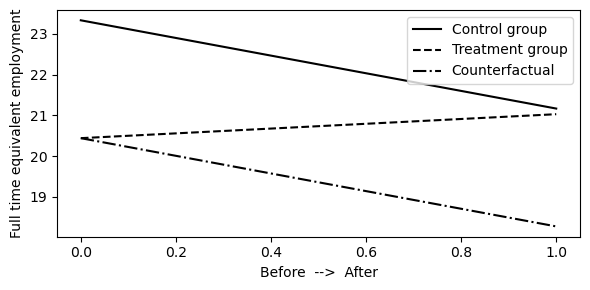

In [37]:
# Difference-in-differences relevant points, A, B, C, and D

b1 = mod1.params['Intercept']

b2 = mod1.params["nj"]

b3 = mod1.params["d"]

delta = mod1.params["nj:d"]

C = b1 + b2 + b3 + delta

E = b1 + b3

B = b1 + b2

A = b1

D = E + (B - A)


# Plotting the difference-in-differences picture

plt.figure(figsize = (6, 3))

plt.xlim = [-0.01, 1.01];

plt.ylim = [18, 24];

plt.xlabel('Before  -->  After');

plt.ylabel('Full time equivalent employment')

plt.plot([0,1],[A,E],linestyle = '-', color = 'black',

    label = 'Control group');

plt.plot([0,1],[B,C],linestyle = '--', color = 'black',

    label = 'Treatment group');

plt.plot([0,1],[B,D],linestyle = '-.', color = 'black',

    label = 'Counterfactual');

plt.legend(loc = 'upper right');

plt.tight_layout();

#plt.savefig('Figs/njmin3plot7.pdf'); plt.close();

In [38]:
# Difference-in-differences with panel data

mod3 = smf.ols('demp ~ nj', data = njmin3).fit()

Rsquared = mod3.rsquared

Fstatistic = mod3.fvalue

Fpvalue = mod3.f_pvalue

tbl = mod3.summary2().tables[1]
tbl

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,-2.283333,0.731258,-3.122474,0.001861,-3.718840,-0.847826
nj,2.750000,0.815186,3.373462,0.000780,1.149736,4.350264
